In [33]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random

##### 3. In class we discussed how to build simulations of the Birth-death Moran process on networks to determine the probability of fixation of a new mutant with selective coefficient s appearing in a random node on the network (same setup as last homework, mutant has (1+s) higher relative probability of birth than wild-type population). Simulate the death-birth process we also mentioned in class: now, at every time step, we first randomly select a node for death, a neighbor node to reproduce, proportional to fitness, followed by the replacement of the death node by the offspring of the birth node. Discuss if and how the probability of mutant fixation is different than the one we saw for the Birth-death process discussed in class. If you observe different fixation probability (for the same parameters), can you provide intuition and discuss why that may be?

In [116]:
def initialize_pop_network(d, num_nodes):
    pop_network = nx.random_regular_graph(d, num_nodes, seed=1)
    network_population = {i: "B" for i in pop_network.nodes}
    network_population[random.choice(list(pop_network.nodes))] = "A"
    # nx.draw(pop_network)
    return pop_network, network_population, num_nodes

res1, res2, res3 = initialize_pop_network(3, 6)
print(res2)
# print(res1, res2, res3)

{0: 'B', 1: 'B', 2: 'B', 4: 'B', 5: 'B', 3: 'A'}


In [102]:
# def death_birth(s, d, num_nodes):
#     net, population, total_people= initialize_pop_network(d, num_nodes)
#     num_of_A = list(population.values()).count("A")
#     num_of_B = total_people - num_of_A
#     neighbors_dict = {node: (list(net.neighbors(node))) for node in net.nodes}
    
#     # continue the death-birth process until A == N
#     while (num_of_A != total_people) and (num_of_B != total_people):
#         # choose random allele to die and gets its neighbors
#         person_to_die = random.choice(list(net.nodes))
#         neighbors = neighbors_dict[person_to_die]

#         # get counts for alleles A and B in the neighbors
#         A = sum(1 for i in neighbors if population[i] == "A")
#         N = len(neighbors)
#         B = N - A
        

#         # probabilities = [B / ((s + 1) * A + B), (s + 1) * A / ((s + 1) * A + B)]
#         probabilities = [1/(2+s), (1+s)/(2+s)]
#         event_to_choose = random.uniform(0, 1)

#         # if weighted probbility selection causes B to reproduce
#         if (event_to_choose < probabilities[0]):
#             if (population[person_to_die] == "A"):
#                 num_of_B += 1
#                 num_of_A -= 1
#             population[person_to_die] = "B" # replacing with B
        
#         # if weighted probability selection causes A to reproduce
#         elif (event_to_choose >= probabilities[0]):
#             if (population[person_to_die] != "A"):
#                 num_of_A += 1
#                 num_of_B -= 1
#             population[person_to_die] = "A" # replacing with A 
        
#     if num_of_A == total_people:
#         return "Mutation A takes over"
#     else:
#         return "Mutation A fails to take over"



In [103]:
# def death_birth2(s, net, d, N):
#     num_of_A = list(d.values()).count("A")
#     num_of_B = N - num_of_A
#     birth_b = 1/(2+s)
#     birth_a = (1+s)/(2+s)
#     while len(set(res2.values())) != 1:
#         node_to_die = random.choice(list(net.nodes)) 
#         neighbors = list(net.neighbors(node_to_die))
#         probabilities = [birth_b if n == "B" else birth_a for n in neighbors]
#         node_to_reproduce = random.choices(neighbors, probabilities)[0]
#         allele_to_reproduce = res2[node_to_reproduce]
#         if allele_to_reproduce == 'A':
#             res2[node_to_die]='A'
#         else:
#             res2[node_to_die]='B'
#     if num_of_A == N:
#         return "Mutation A takes over"
#     elif num_of_B == N:
#         return "Mutation A fails to take over"







In [104]:
# plt.figure(figsize=(10, 6))
# plt.plot(list(death_birth2_fix_probs.keys()), list(death_birth2_fix_probs.values()))
# # for i, A_population in enumerate(death_birth_fix_probs):
# #     plt.plot(range(len(A_population)), A_population,)

# plt.xlabel('s-value ')
# plt.ylabel('Fixation Probability')
# plt.title('Fixation Probability of Death-Birth Process with changing s-value')
# plt.show()


In [117]:
def death_birth(s, d, num_nodes, num):
    net, population, total_people= initialize_pop_network(d, num_nodes)

    neighbors_dict = {node: (list(net.neighbors(node))) for node in net.nodes}
    birth_b = 1/(2+s)
    birth_a = (1+s)/(2+s)
    # continue the death-birth process until A == N
    fixation_count = 0
    
    while len(set(population.values())) > 1:
        
        # choose random allele to die and gets its neighbors
        person_to_die = random.choice(list(net.nodes))
        neighbors = list(net.neighbors(person_to_die))
        # neighbors_dict[person_to_die]
    
        
        
        # probabilities = [B / ((s + 1) * A + B), (s + 1) * A / ((s + 1) * A + B)]
        probabilities = [birth_b if n == "B" else birth_a for n in neighbors]
        
        node_to_reproduce = random.choices(neighbors, probabilities)[0]
        
        
        # print(node_to_reproduce)
        if population[person_to_die] != population[node_to_reproduce]:
            
            population[person_to_die] = population[node_to_reproduce]
            # if population[node_to_reproduce] == "A":
            #     # print("Hi")
                
            #     num_of_A +=1
            #     num_of_B -=1
            # else:
            #     num_of_A -= 1
            #     num_of_B += 1
    if list(population.values()).count('A') == num_nodes:
        fixation_count += 1

    return fixation_count
        
    # if num_of_A == total_people:
    #     return "Mutation A takes over"
    # elif num_of_B == total_people:
    #     return "Mutation A fails to take over"
   



In [118]:
num_of_trials = 1000
s_values = [0, 0.01, 0.1, 0.5, 0.8, 1]
death_birth_fix_probs = dict()
for s in s_values:
    count = 0 
    for i in range(num_of_trials):
        result = death_birth(s, 3, 10)
        if result == "Mutation A takes over":
            count += 1
    death_birth_fix_probs[s] = count/num_of_trials
    print(f"Fixation Probability in the death-birth process is for s = {s}: {count/num_of_trials}")
print(death_birth_fix_probs)


ValueError: Total of weights must be greater than zero

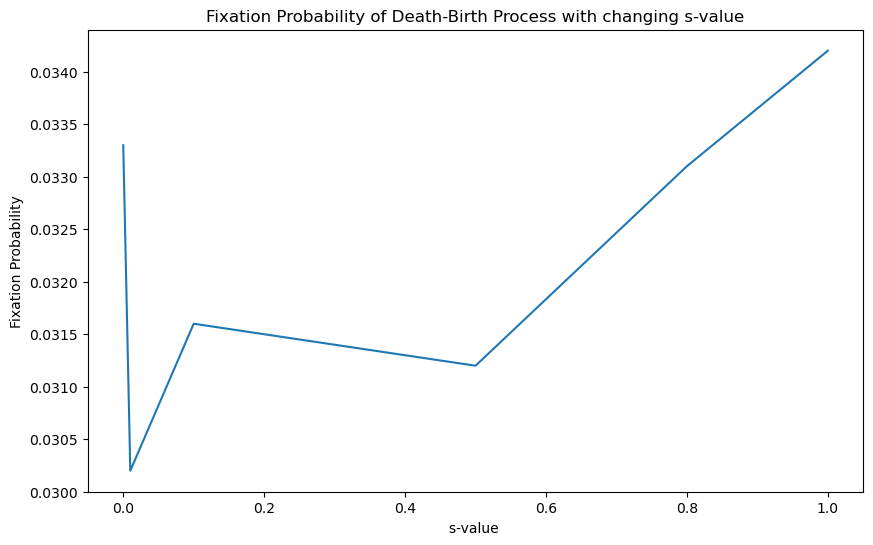

In [61]:
plt.figure(figsize=(10, 6))
plt.plot(list(death_birth_fix_probs.keys()), list(death_birth_fix_probs.values()))
# for i, A_population in enumerate(death_birth_fix_probs):
#     plt.plot(range(len(A_population)), A_population,)

plt.xlabel('s-value ')
plt.ylabel('Fixation Probability')
plt.title('Fixation Probability of Death-Birth Process with changing s-value')
plt.show()


In [63]:
def birth_death_network(s, d, num_nodes):
    net, population, total_people= initialize_pop_network(d, num_nodes)
    num_of_A = list(population.values()).count("A")
    num_of_B = total_people - num_of_A
    neighbors_dict = {node: (list(net.neighbors(node))) for node in net.nodes}
    fixation_occurred = False
    # continue the death-birth process until A == N
    while (num_of_A != total_people) and (num_of_B != total_people):
        
        # choose random allele to die and gets its neighbors
        person_to_reproduce = random.choice(list(net.nodes))
        neighbors = neighbors_dict[person_to_reproduce]
    
        death_b = 1/(2+s)
        death_a = (1+s)/(2+s)
        
        # probabilities = [B / ((s + 1) * A + B), (s + 1) * A / ((s + 1) * A + B)]
        probabilities = [death_b if n == "B" else death_a for n in neighbors]
        # print(population[person_to_reproduce])
        node_to_die = random.choices(neighbors, probabilities)[0]
        # print(population[node_to_die])
        if population[person_to_reproduce] != population[node_to_die]:
            
            population[node_to_die] = population[person_to_reproduce]
            # print("-", population[person_to_reproduce])
            # print("-", population[node_to_die])
            if population[node_to_die] == "A":
                # print("Hi")
                num_of_A +=1
                num_of_B -=1
            else:
                num_of_A -= 1
                num_of_B += 1
    
        
    if num_of_A == total_people:
        return "Mutation A takes over"

    elif num_of_B == total_people:
        return "Mutation A fails to take over"
   

In [64]:
num_of_trials = 10000
s_values = [0, 0.01, 0.1, 0.5, 0.8, 1]
birth_death_fix_probs = dict()
for s in s_values:
    count = 0 
    for i in range(num_of_trials):
        result = birth_death_network(s, 3, 30)
        if result == "Mutation A takes over":
            count += 1
    birth_death_fix_probs[s] = count/num_of_trials
    print(f"Fixation Probability in the brith-death process is for s = {s}: {count/num_of_trials}")

print(birth_death_fix_probs)

Fixation Probability in the brith-death process is for s = 0: 0.0315
Fixation Probability in the brith-death process is for s = 0.01: 0.0322
Fixation Probability in the brith-death process is for s = 0.1: 0.0348
Fixation Probability in the brith-death process is for s = 0.5: 0.0319
Fixation Probability in the brith-death process is for s = 0.8: 0.0351
Fixation Probability in the brith-death process is for s = 1: 0.0334
{0: 0.0315, 0.01: 0.0322, 0.1: 0.0348, 0.5: 0.0319, 0.8: 0.0351, 1: 0.0334}


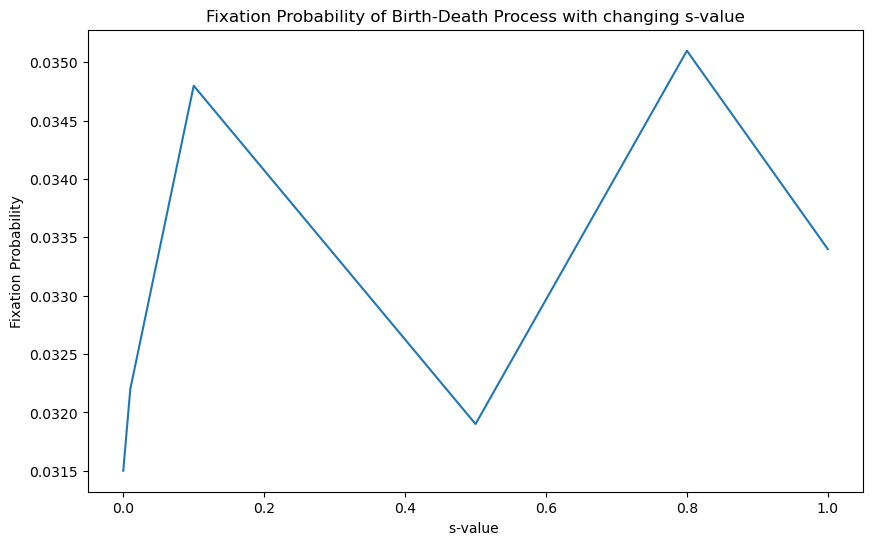

In [65]:
plt.figure(figsize=(10, 6))
plt.plot(list(birth_death_fix_probs.keys()), list(birth_death_fix_probs.values()))

plt.xlabel('s-value ')
plt.ylabel('Fixation Probability')
plt.title('Fixation Probability of Birth-Death Process with changing s-value')
plt.show()

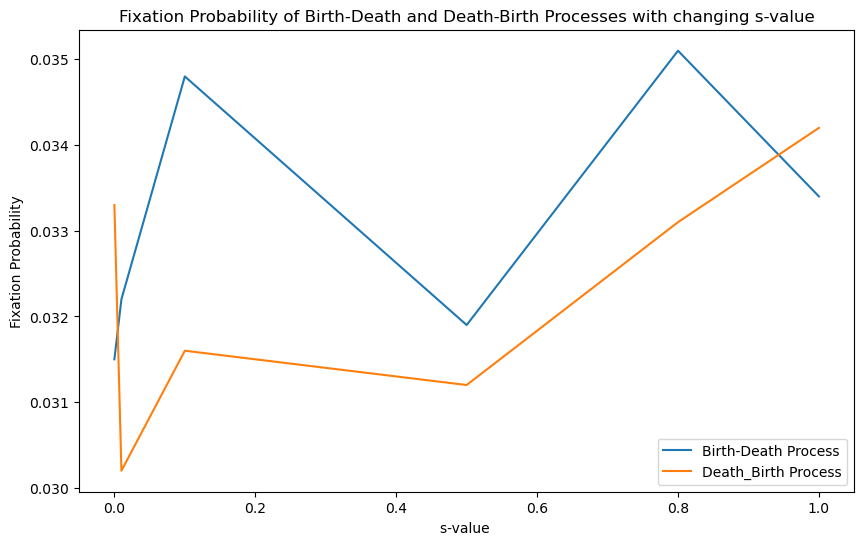

In [66]:
plt.figure(figsize=(10, 6))
plt.plot(list(birth_death_fix_probs.keys()), list(birth_death_fix_probs.values()), label = "Birth-Death Process")
plt.plot(list(death_birth_fix_probs.keys()), list(death_birth_fix_probs.values()), label = "Death_Birth Process")
plt.legend()
plt.xlabel('s-value ')
plt.ylabel('Fixation Probability')
plt.title('Fixation Probability of Birth-Death and Death-Birth Processes with changing s-value')
plt.show()

#### 4. The SZR model on networks: For our purposes, consider a random network containing completely susceptible individuals and discrete time updates. We’ll now think of the parameters above as probabilities, and ignore birth processes (θ). Assume that in each time step, all edges convey interactions, meaning each individual interacts with each of their neighbors. Simulate this model for different types of networks and see if you can determine for which network types and spreading parameters will local zombification take off (i.e., grow exponentially, at least in the short term), given one randomly chosen individual becomes the first zombie? (The long term dynamics will likely be complicated so we will focus on the initial dynamics.)

In [30]:
def szr_model(theta, beta, gamma, xi, alpha, t, num_nodes, d, graph_type):
    # random network containing completely susceptible individuals 
    if graph_type == "random_regular_graph":
        pop_network = nx.random_regular_graph(d, num_nodes, seed=1)
    # elif
    network_population = {i: "S" for i in pop_network.nodes}
    # one randomly chose indidividual becomes the first zombie
    node =  random.choice(list(pop_network.nodes))
    network_population[node] = "Z"
    
    for i in range(t):
        S = sum(1 for value in network_population.values() if value == "S")
        Zombies_in_network = [node for node in list(pop_network.nodes) if network_population[node] == "Z"]
        Z = len(Zombies_in_network)
        zombies = []
        for zombie in Zombies_in_network:
            for node in list(pop_network.neighbors(zombie)):
                if network_population[node] == "S":
                    zombies.append(zombie)
                    break
        R = sum(1 for value in network_population.values() if value == "R")
       
        # differential equations
        infection_rate = (beta*S*Z) + (xi*R) - (alpha*S*Z)
        death_rate = (gamma*S) + (alpha*S*Z) - (xi*R)
        total = infection_rate + death_rate  
          
        f = random.uniform(0, total)
        if len(zombies) == 0:
            f = infection_rate + 1 #infection cannot occur if zombies list is empty
        
        if death_rate< 0:
            # pick a random dead person to resurrect 
            dead_person = random.choice([node for node in network_population if network_population[node]== "R"])
            # label it "Z" in the dict
            network_population[dead_person] = "Z"
            
        elif (f < infection_rate):
            # infection occurs
            # choose a random infector zombie
            infector = random.choice(zombies)
            # get its possible victims
            possible_victims = [node for node in list(pop_network.neighbors(infector)) if network_population[node] == "S"]
            # randomly select a victim
            if possible_victims == []:
                print("no neighbors")
            
            if possible_victims:
                victim = random.choice(possible_victims)
            # label it "Z" in the network_population dict
                network_population[victim] = "Z"
            
        else:
            # death occurs
            # choose a random zombie to die 
            dead_zombie = random.choice([node for node in network_population if network_population[node]== "Z"])
            # label it  "R" in the network_population dict
            network_population[dead_zombie] = "R"
         
    if S == 0:
        return 1
    else:
        return 0       
    

In [31]:
# theta = 0
# beta = 0.0095
# gamma = 0
# xi = 0.0001
# alpha = 0.005
# t = 20
# num_nodes = 6
# d = 3
# graph_type = "random_regular_graph"
# zombifications = 0
# for i in range(1):
#     result = szr_model(theta, beta, gamma, xi, alpha, t, num_nodes, d, graph_type)
#     zombifications += result
# print(zombifications)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


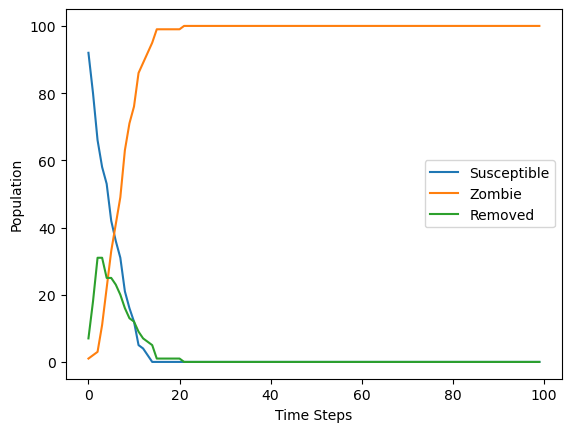

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

def initialize_network(nodes):
    G = nx.erdos_renyi_graph(nodes, 0.2)  # Adjust the network type and parameters as needed
    initial_zombie = np.random.choice(G.nodes)
    node_attributes = {node: {'state': 'S'} for node in G.nodes}
    print(G.nodes)
    node_attributes[initial_zombie]['state'] = 'Z'
    nx.set_node_attributes(G, node_attributes)
    return G

def simulate_zombie_attack(G, theta, beta, gamma, xi, alpha, num_steps):
    states = {'S': 0, 'Z': 1, 'R': 2}
    results = np.zeros((num_steps, 3))

    for step in range(num_steps):
        for node in G.nodes:
            neighbors = list(G.neighbors(node))
            
            # Check if the 'state' attribute exists for the current node
            if 'state' in G.nodes[node]:
                num_infected_neighbors = sum(1 for neighbor in neighbors if G.nodes[neighbor].get('state') == 'Z')

                prob_become_zombie = beta * num_infected_neighbors / len(neighbors)
                
                # Fix: Apply multiplication based on the state
                if G.nodes[node]['state'] == 'S':
                    prob_defeat_zombie = alpha
                else:
                    prob_defeat_zombie = 0.0
                
                prob_resurrect = xi * (G.nodes[node]['state'] == 'R')
                prob_death = gamma * (G.nodes[node]['state'] == 'S')

                rand_val = np.random.rand()

                if G.nodes[node]['state'] == 'S':
                    if rand_val < prob_death:
                        G.nodes[node]['state'] = 'R'
                    elif rand_val < prob_death + prob_become_zombie:
                        G.nodes[node]['state'] = 'Z'
                elif G.nodes[node]['state'] == 'R':
                    if rand_val < prob_resurrect:
                        G.nodes[node]['state'] = 'Z'

        state_counts = np.array([list(nx.get_node_attributes(G, 'state').values()).count(state) for state in states])
        results[step, :] = state_counts

    return results

def plot_simulation_results(results):
    plt.plot(results[:, 0], label='Susceptible')
    plt.plot(results[:, 1], label='Zombie')
    plt.plot(results[:, 2], label='Removed')
    plt.xlabel('Time Steps')
    plt.ylabel('Population')
    plt.legend()
    plt.show()

# Parameters
num_nodes = 100
theta = 0.1
beta = 0.3
gamma = 0.1
xi = 0.2
alpha = 0.2
num_steps = 100

# Initialize and simulate
network = initialize_network(num_nodes)
simulation_results = simulate_zombie_attack(network, theta, beta, gamma, xi, alpha, num_steps)

# Plot results
plot_simulation_results(simulation_results)
